# Softmax

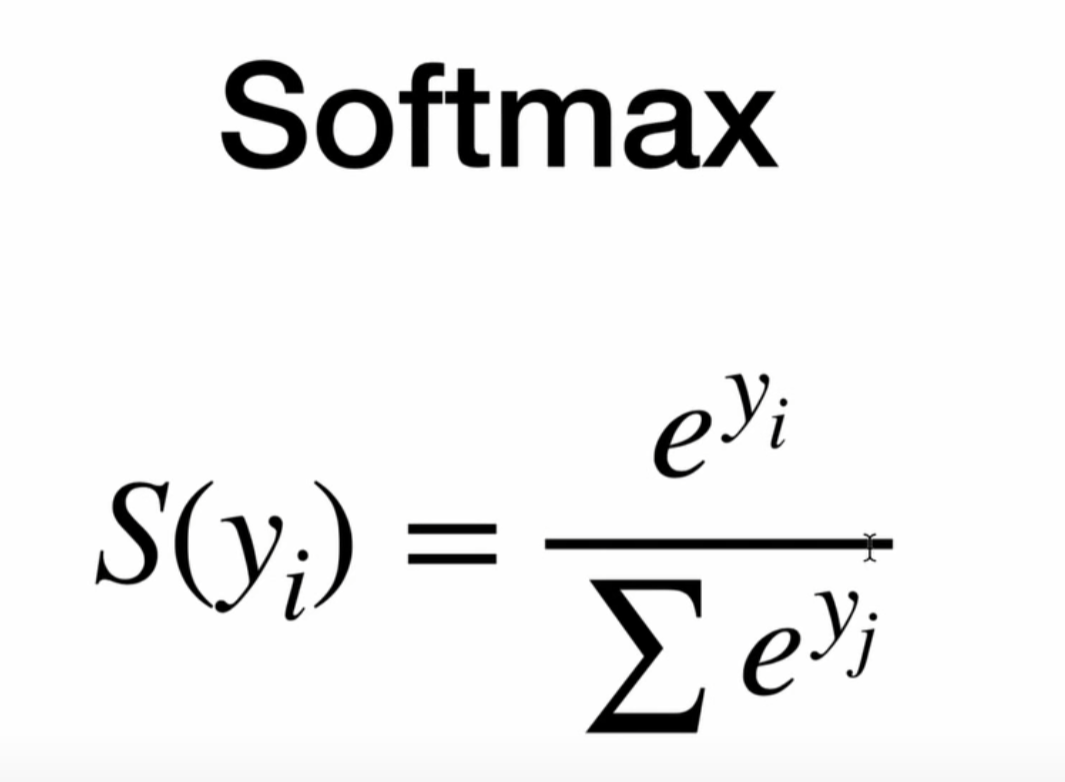

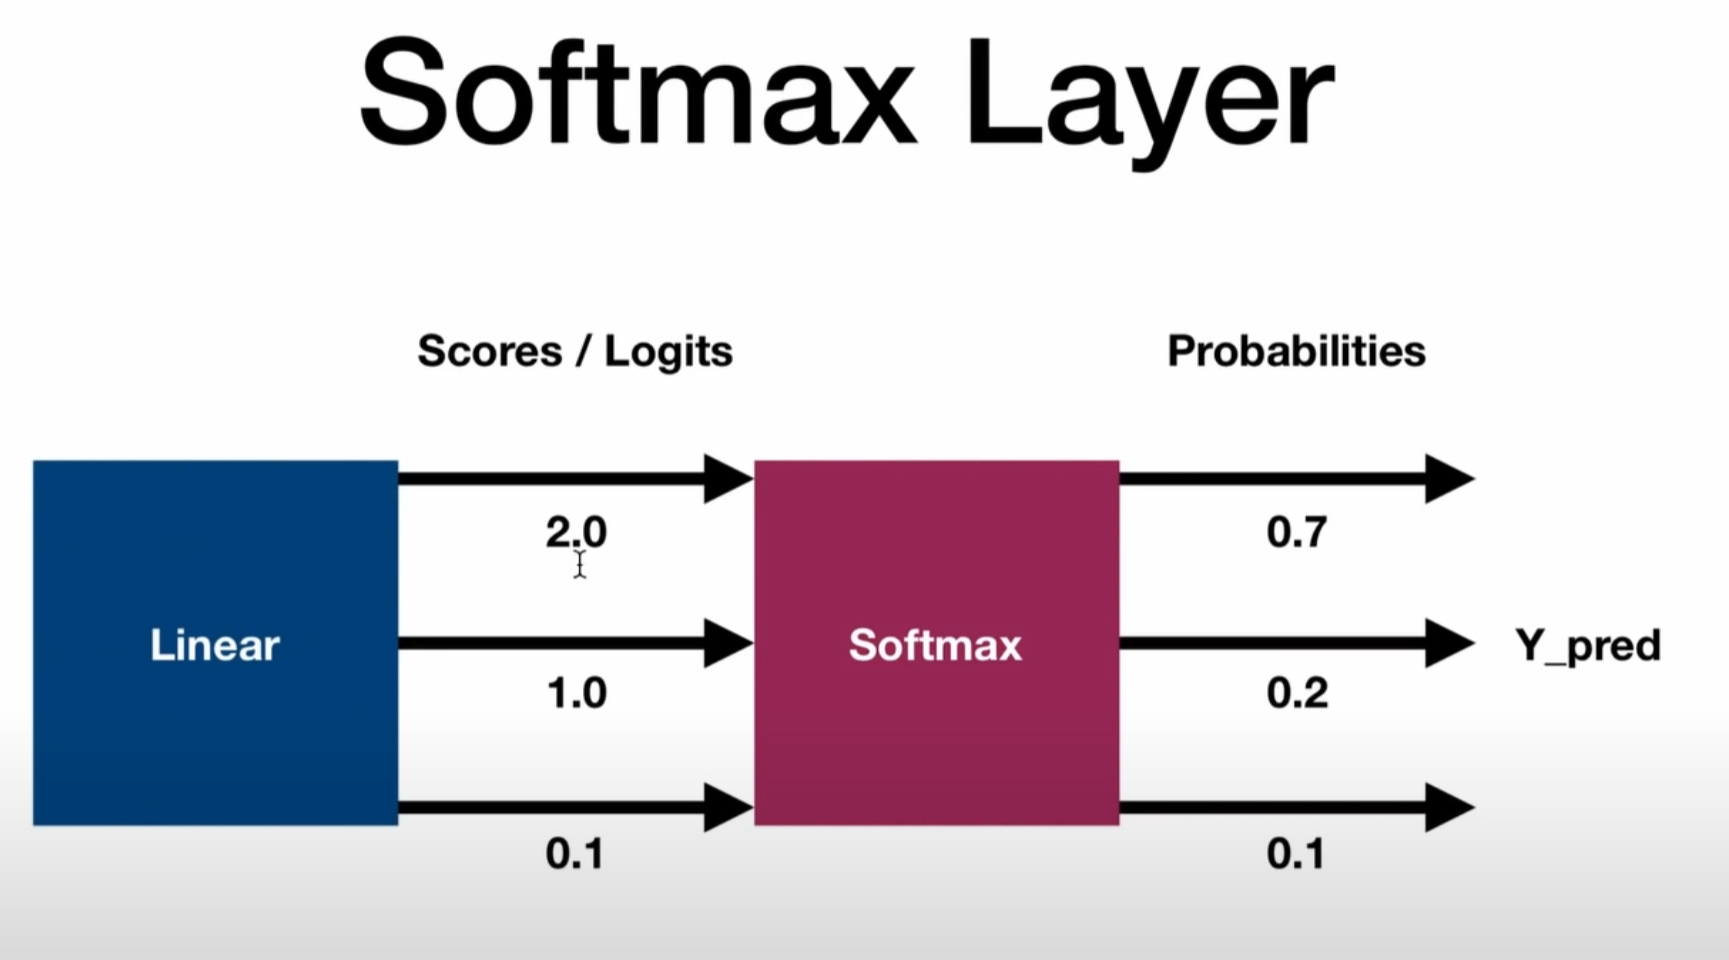

In [ ]:
import torch 
import torch.nn as nn
import numpy as np

In [ ]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0,1.0,0.1])
output = softmax(x)
print('softmax numpy: ', output)

softmax numpy:  [0.65900114 0.24243297 0.09856589]


In [ ]:
#using torch

x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x, dim=0) #we use dim = 0 so it computes along first axis
outputs

tensor([0.6590, 0.2424, 0.0986])

# Cross Entropy (can be used in multiclass)

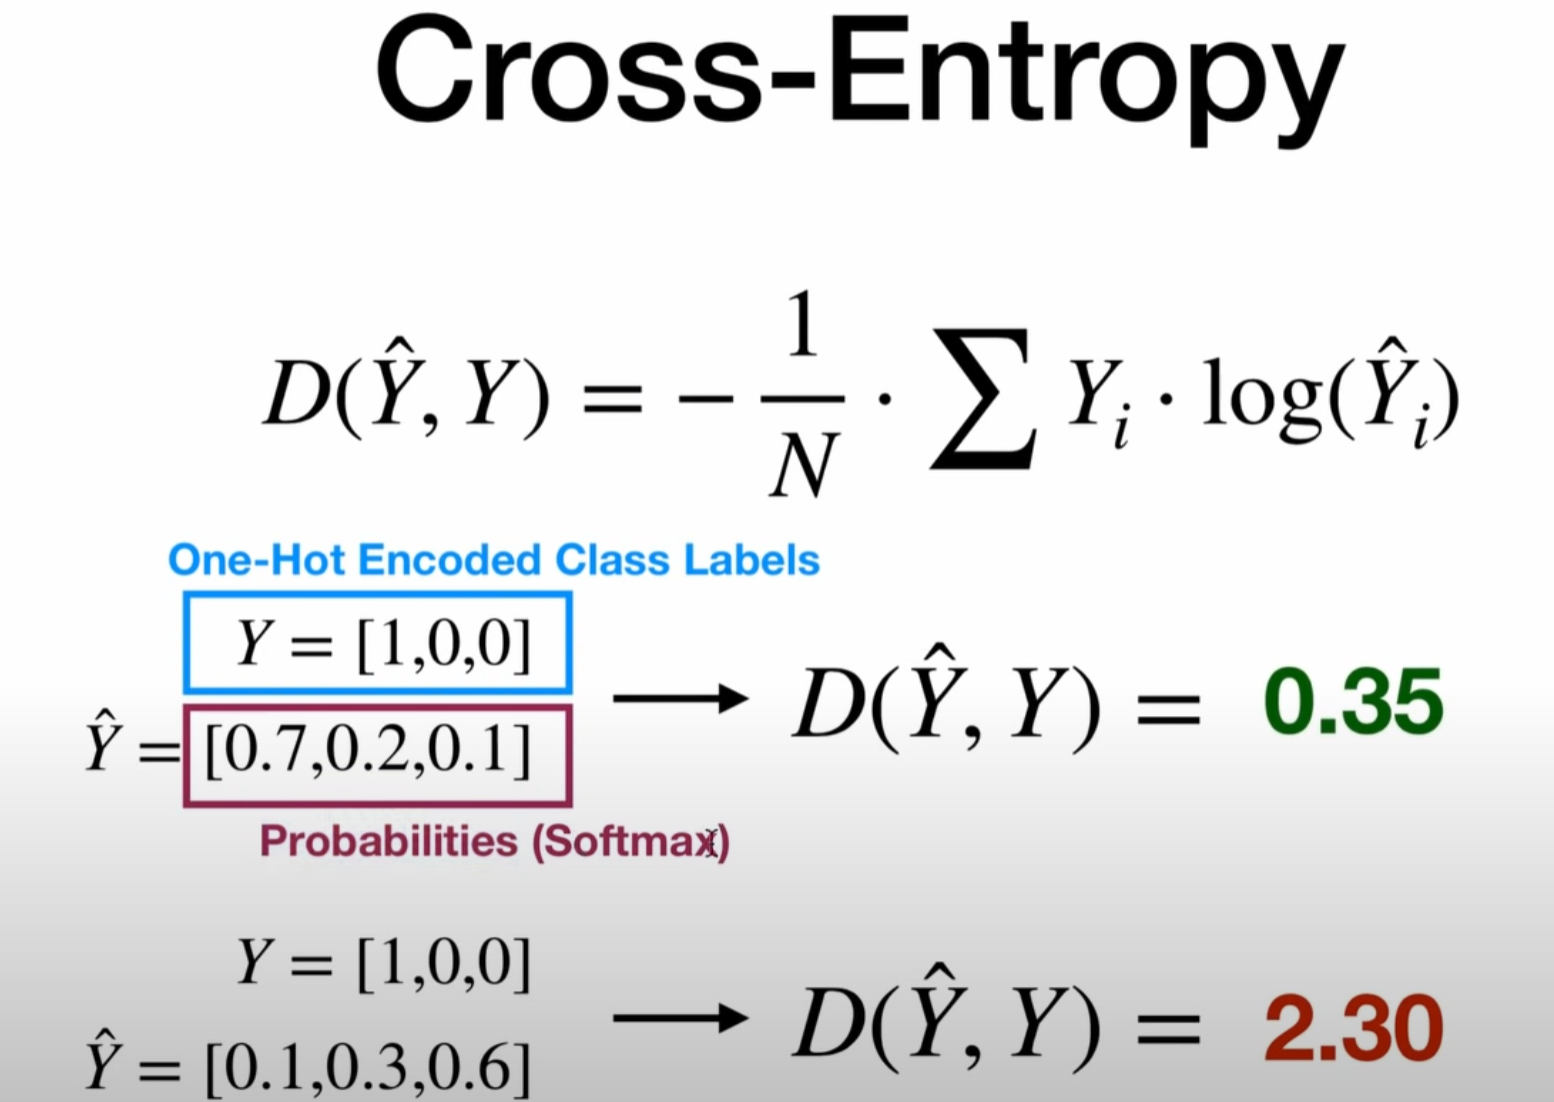

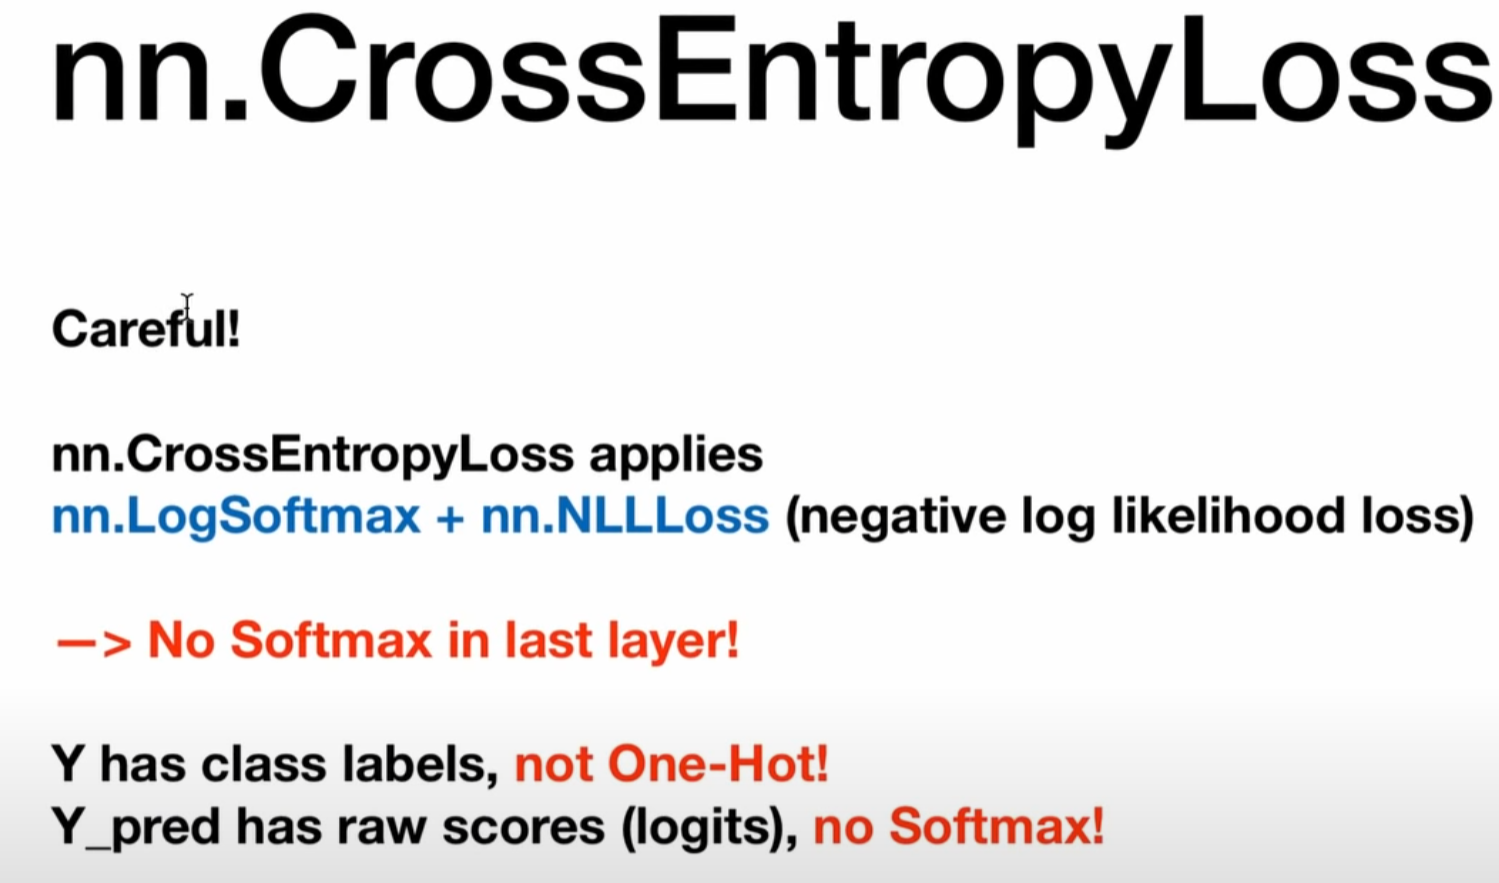

Better prediction -> Lower loss (example is up)

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
def cross_entropy(actual, predicted):
  loss = -np.sum(actual* np.log(predicted))
  return loss # We can normalize it by writing this --> / float(predicted.shape[0])

In [ ]:
# Creating Y which MUST be one-hot encoded (1 or 0)
#if class 0: [1,0,0]
#if class 1: [0,1,0]
#and etc

Y=np.array([1,0,0])

#Y_pred probas 
Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad = np.array([0.1,0.3,0.6])

l1 = cross_entropy(Y,Y_pred_good)
l2 = cross_entropy(Y,Y_pred_bad)

print(f"Loss1 numpy {l1:.4f}")
print(f"Loss2 numpy {l2:.4f}")

Loss1 numpy 0.3567
Loss2 numpy 2.3026


In [ ]:
#Using pytorch

loss = nn.CrossEntropyLoss()

# 1 sample
Y = torch.tensor([0])
# n_samples * n_classes = 1 * 3
Y_pred_good = torch.tensor([[2.0,1.0,0.1]]) #raw values
Y_pred_bad = torch.tensor([[0.5,2.0,0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())


_, predictions_good = torch.max(Y_pred_good, 1)
_, predictions_bad = torch.max(Y_pred_bad, 1)
print(predictions_good) # shows class number 0, because chances are higher in y_pred_good
print(predictions_bad) # shows class number 1, because chances are higher in y_pred_bad

0.4170299470424652
1.840616226196289
tensor([0])
tensor([1])


In [ ]:
#Using pytorch

loss = nn.CrossEntropyLoss()

# 3 samples
Y = torch.tensor([2,0,1])
# n_samples * n_classes = 3 * 3
Y_pred_good = torch.tensor([[0.1,1.0,2.1] ,[2.0,1.0,0.1] ,[0.1,3.0,0.1] ]) #raw values
Y_pred_bad = torch.tensor([[2.1,1.0,0.1]  ,[0.1,1.0,2.1] ,[0.1,3.0,0.1] ])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())


_, predictions_good = torch.max(Y_pred_good, 1)
_, predictions_bad = torch.max(Y_pred_bad, 1)
print(predictions_good) # shows class number 0, because chances are higher in y_pred_good
print(predictions_bad) # shows class number 1, because chances are higher in y_pred_bad

0.3018244206905365
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


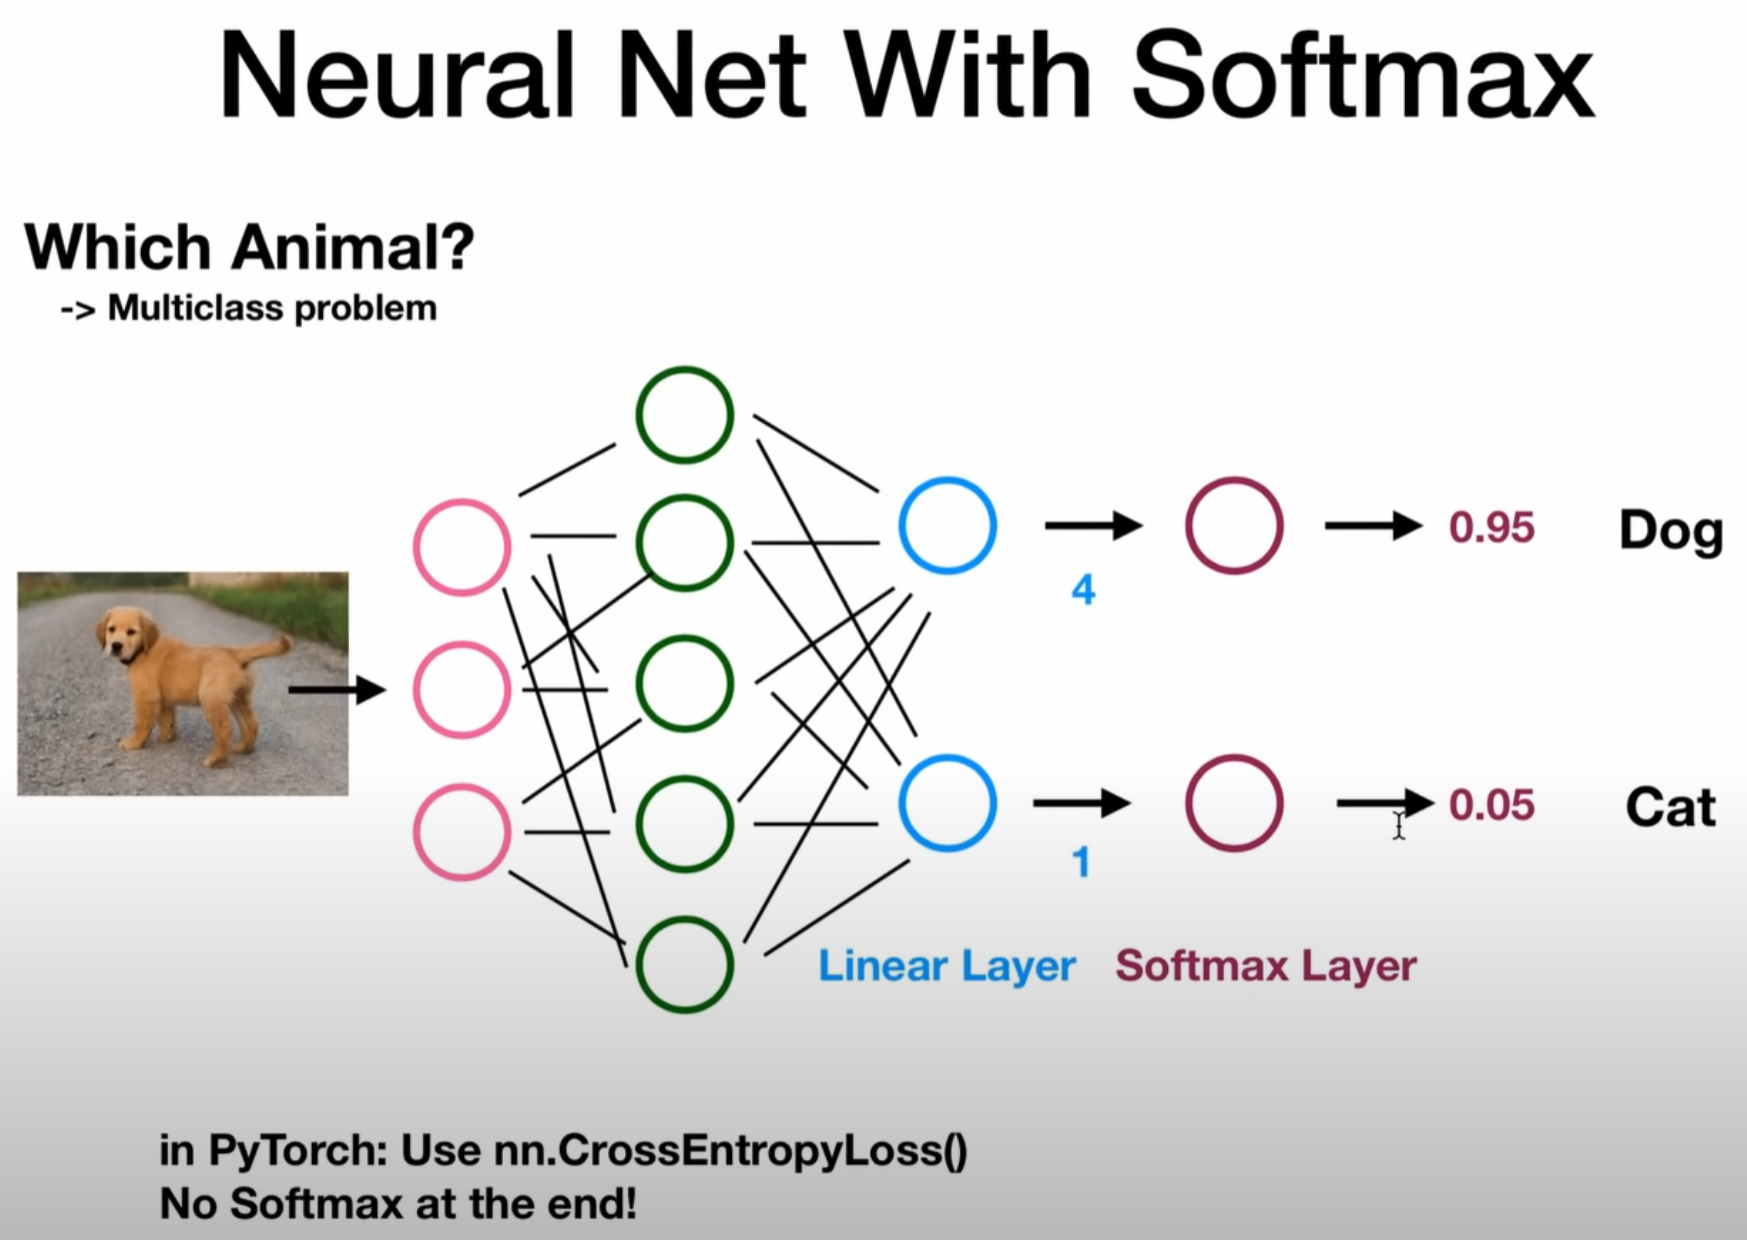